# **RANDOM FOREST**

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pickle
with open('/content/iris.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [ ]:
modelo = RandomForestClassifier(n_estimators=10, max_features=3, criterion='gini', random_state = 0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_features=3, n_estimators=10, random_state=0)

# **TESTE DO MODELO**

In [ ]:
previsoes = modelo.predict(X_teste)

In [ ]:
previsoes

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

# **ANÁLISE DE ACERTOS DO MODELO**

In [ ]:
y_teste

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

1.0

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

1.0

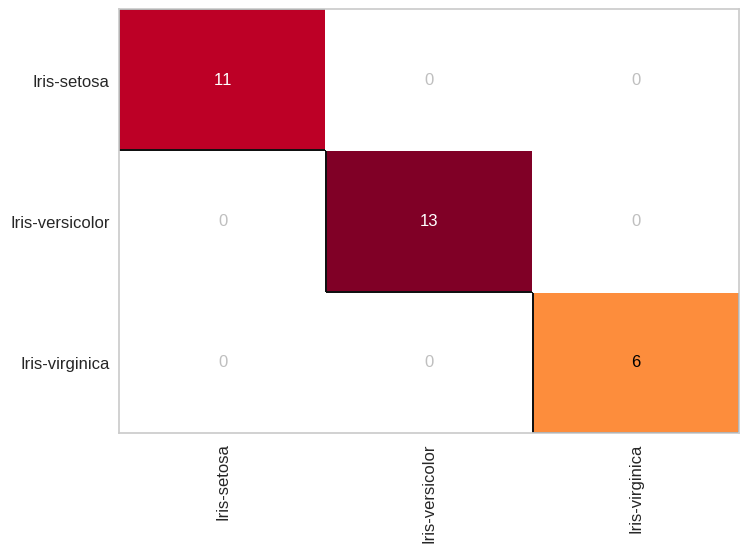

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# **ANÁLISE DE PRIORIDADE DO RANDOM FOREST**

In [ ]:
print(modelo.feature_importances_)

[0.01160119 0.00721406 0.30342893 0.67775582]


# **ANÁLISE DE DISTRIBUIÇÃO DE DADOS**

In [ ]:
Base = pd.read_csv('/content/Iris.csv', ',')

<ipython-input-24-153427f37c33>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  Base = pd.read_csv('/content/Iris.csv', ',')


In [ ]:
Base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
Base['petallength'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petallength, dtype: float64

<Axes: >

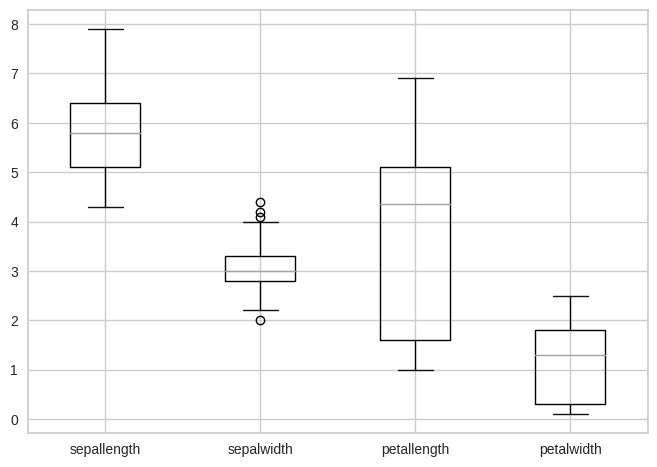

In [ ]:
import matplotlib.pyplot as plt
Base.boxplot(column=['sepallength','sepalwidth','petallength','petalwidth'])

<Axes: xlabel='class', ylabel='sepallength'>

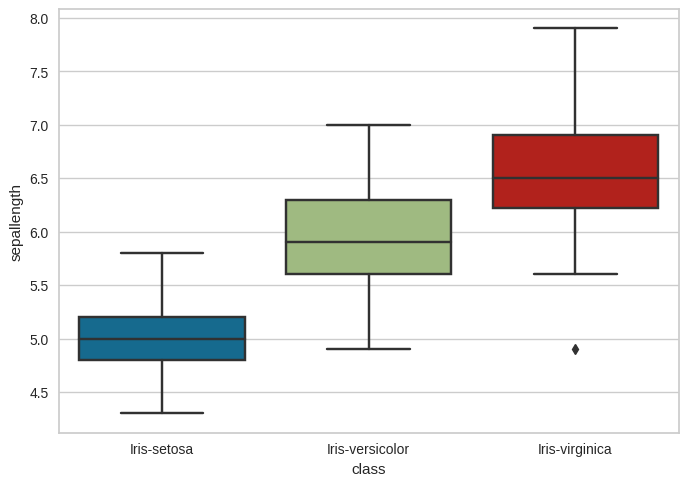

In [ ]:
sns.boxplot(data=Base,x="class", y="sepallength")

<Axes: xlabel='class', ylabel='sepalwidth'>

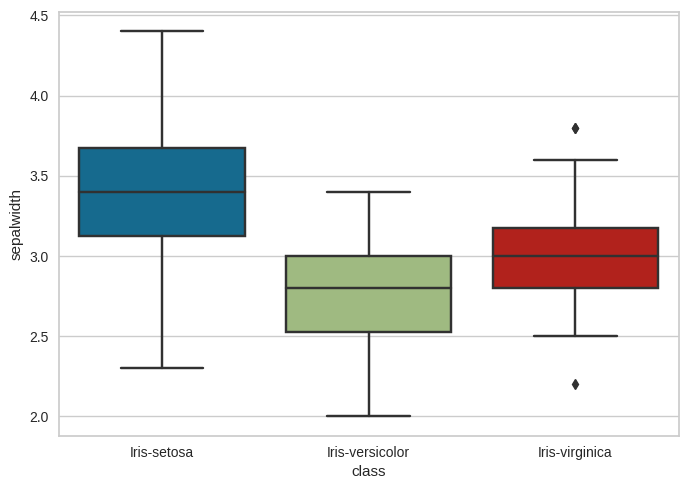

In [ ]:
sns.boxplot(data=Base,x="class", y="sepalwidth")

<Axes: xlabel='class', ylabel='petallength'>

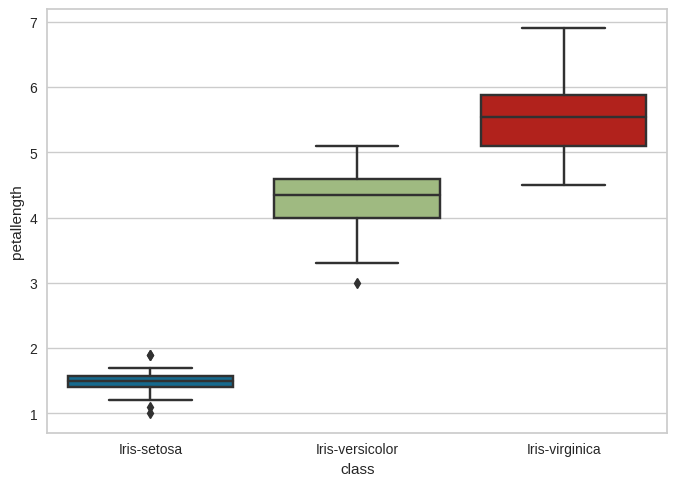

In [ ]:
sns.boxplot(data=Base,x="class", y="petallength")

<Axes: xlabel='class', ylabel='petalwidth'>

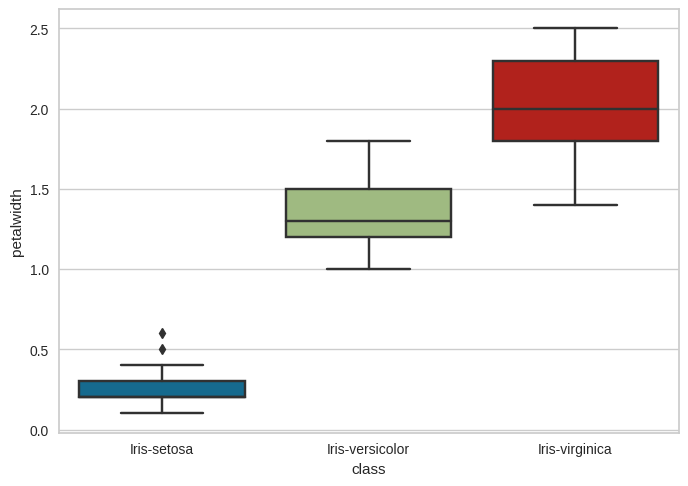

In [ ]:
sns.boxplot(data=Base,x="class", y="petalwidth")